In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymodulon.core import IcaData
from pymodulon import example_data
from pymodulon.io import save_to_json, load_json_model
from pymodulon.enrichment import *
import plotly.express as px
#from pymodulon.plotting import *
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from itertools import combinations
from scipy.stats import spearmanr, pearsonr
import seaborn as sns

In [2]:
ica_data = load_json_model('../data/yarrowia2025.json')

In [3]:
w29 = ica_data.sample_table[(ica_data.sample_table['project']=='Growth_Variance_W29')]
w29_gr = [0,0,0.1,0.1,0.15,0.15,0.2,0.2,0.25,0.25,0.3,0.3]
st = ica_data.sample_table[(ica_data.sample_table['project']=='Growth_Variance_ST8712')]
st_gr = [0.05,0.05,0.075,0.075,0.1,0.1,0.125,0.125,0.15,0.15]

growth_df = pd.DataFrame({'growth_rate': w29_gr}, index=ica_data.A[w29.index].columns)
df_merged = ica_data.A[w29.index].T.join(growth_df)
w29_A_gr = df_merged.groupby('growth_rate').mean().T


growth_df = pd.DataFrame({'growth_rate': st_gr}, index=ica_data.A[st.index].columns)
df_merged = ica_data.A[st.index].T.join(growth_df)
st_A_gr = df_merged.groupby('growth_rate').mean().T



In [4]:
st_A_gr

growth_rate,0.050,0.075,0.100,0.125,0.150
0,4.924291,1.869030,6.106227e-16,0.194093,0.047142
1,4.389358,1.962654,1.415534e-15,-1.224599,-0.581609
2,28.485927,2.994491,-1.998401e-15,-0.524583,0.772947
3,1.897350,1.895771,1.332268e-15,-1.766472,-2.337333
4,12.083800,-0.152398,4.329870e-15,-1.369889,-3.515600
5,-5.358430,0.993874,-1.387779e-15,0.028131,0.226520
6,-3.074507,-8.028724,1.110223e-16,3.032109,6.141865
7,1.503914,8.864579,-1.776357e-15,-3.645319,-5.885159
8,3.463174,2.569026,9.992007e-16,-1.237550,-2.295404
9,-3.813901,1.474540,3.330669e-15,-0.294738,-0.714513


In [5]:
# Compute Spearman correlation for each row
w29_correlations = []
st_correlations = []
w29_pvalues = []
st_pvalues = []


for idx, row in w29_A_gr.iterrows():
    corr, pval = spearmanr(row.values, row.index.tolist())
    w29_correlations.append(corr)
    w29_pvalues.append(pval)

w29_corr_df = pd.DataFrame({
    'iModulon': w29_A_gr.index,
    'Spearman_corr': w29_correlations,
    'p_value': w29_pvalues
})


w29_corr_df = w29_corr_df.sort_values(by='Spearman_corr', ascending=False).reset_index(drop=True)



for idx, row in st_A_gr.iterrows():
    corr, pval = spearmanr(row.values, row.index.tolist())
    st_correlations.append(corr)
    st_pvalues.append(pval)

# Create a result dataframe
st_corr_df = pd.DataFrame({
    'iModulon': st_A_gr.index,
    'Spearman_corr': st_correlations,
    'p_value': st_pvalues
})

# Optional: sort by correlation
st_corr_df = st_corr_df.sort_values(by='Spearman_corr', ascending=False).reset_index(drop=True)



In [6]:
w20_high_corrs = w29_corr_df[abs(w29_corr_df['Spearman_corr'])>0.95]

st_high_corrs = st_corr_df[abs(st_corr_df['Spearman_corr'])>0.95]

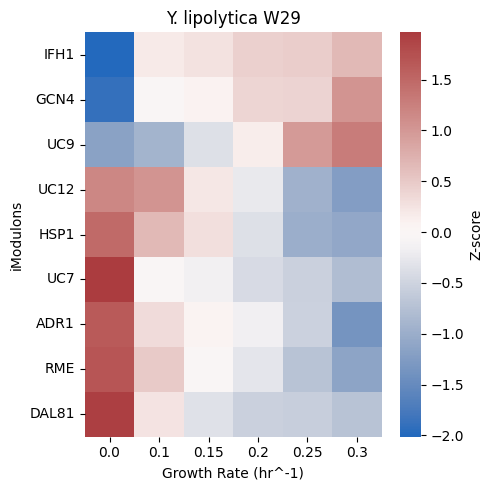

In [7]:
filtered_df_norm = (w29_A_gr.loc[w20_high_corrs['iModulon']]- w29_A_gr.loc[w20_high_corrs['iModulon']].mean(axis=1).values[:, None]) / w29_A_gr.loc[w20_high_corrs['iModulon']].std(axis=1).values[:, None]

# 5. Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(filtered_df_norm, cmap="vlag", center=0, cbar_kws={'label': 'Z-score'})
yticks = np.arange(len(filtered_df_norm.index))
ylabels = [ica_data.imodulon_table.loc[w]['iModulon Name'] for w in filtered_df_norm.index]
plt.yticks(yticks+0.5,ylabels,rotation=0)
plt.title("Y. lipolytica W29")
plt.xlabel("Growth Rate (hr^-1)")
plt.ylabel("iModulons")
plt.tight_layout()
plt.show()


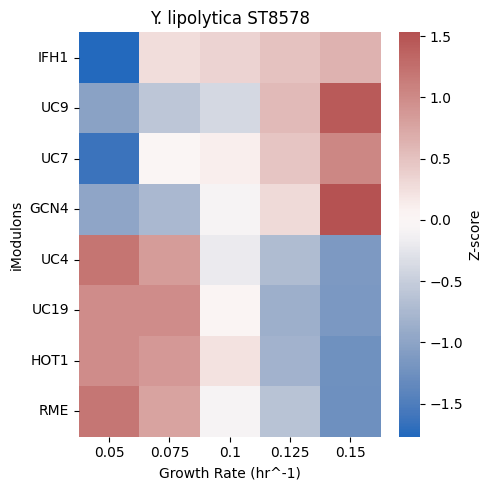

In [8]:
filtered_df_norm = (st_A_gr.loc[st_high_corrs['iModulon']]- st_A_gr.loc[st_high_corrs['iModulon']].mean(axis=1).values[:, None]) / st_A_gr.loc[st_high_corrs['iModulon']].std(axis=1).values[:, None]

# 5. Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(filtered_df_norm, cmap="vlag", center=0, cbar_kws={'label': 'Z-score'})
yticks = np.arange(len(filtered_df_norm.index))
ylabels = [ica_data.imodulon_table.loc[w]['iModulon Name'] for w in filtered_df_norm.index]
plt.yticks(yticks+0.5,ylabels,rotation=0)
plt.title("Y. lipolytica ST8578")
plt.xlabel("Growth Rate (hr^-1)")
plt.ylabel("iModulons")
plt.tight_layout()
plt.show()


In [10]:
ica_data.view_imodulon(8)[abs(ica_data.view_imodulon(8)['gene_weight'])>0.1]

,gene_weight,accession,source,feature,start,end,score,strand,phase,attributes,...,sacc_gene_product,COG_category,Description,Preferred_name,GOs,PFAMs,KEGG_Pathway,KEGG_Module,BRITE,regulator
YALI1_A01122g,0.119194,NC_090770.1,RefSeq,CDS,111249.0,112292.0,.,-,0,ID=cds-XP_499631.1;Parent=rna-XM_499631.3;Dbxr...,...,NaN,C,to uniprot Q02895 Saccharomyces cerevisiae YPL...,-,-,Aldo_ket_red,-,-,-,NaN
YALI1_A04533g,0.174302,NC_090770.1,RefSeq,CDS,452550.0,453398.0,.,-,0,ID=cds-XP_499750.3;Parent=rna-XM_499750.3;Dbxr...,...,NaN,S,NmrA-like family,-,-,NmrA,-,-,-,NaN
YALI1_A08424g,0.158938,NC_090770.1,RefSeq,CDS,840772.0,842463.0,.,-,0,ID=cds-XP_065950135.1;Parent=rna-XM_066094063....,...,Tpo4p,S,resistance protein,MDR1,"GO:0000296,GO:0000297,GO:0003674,GO:0005215,GO...",MFS_1,-,-,"ko00000,ko02000",NaN
YALI1_B08493g,0.133404,NC_090771.1,RefSeq,CDS,849377.0,850522.0,.,+,0,ID=cds-XP_500567.4;Parent=rna-XM_500567.4;Dbxr...,...,NaN,C,to uniprot Q03558 Saccharomyces cerevisiae YHR...,OYE2,"GO:0003674,GO:0003824,GO:0003959,GO:0005575,GO...",Oxidored_FMN,-,-,"ko00000,ko01000",NaN
YALI1_C06681g,0.108697,NC_090772.1,RefSeq,CDS,666526.0,668124.0,.,-,0,ID=cds-XP_501466.3;Parent=rna-XM_501466.3;Dbxr...,...,aromatic-amino-acid:2-oxoglutarate transaminase,E,to Saccharomyces cerevisiae ARO9 (YHR137W),ARO9,"GO:0003674,GO:0003824,GO:0005575,GO:0005622,GO...",Aminotran_1_2,"ko00350,ko00360,ko00400,ko00960,ko01100,ko0111...",-,"ko00000,ko00001,ko01000,ko01007","INO2,MET32,MET4,MSN2,MSN4,NDT80,PHO4,STE12,TUP..."
YALI1_C26959g,0.166370,NC_090772.1,RefSeq,CDS,2695318.0,2695923.0,.,-,0,ID=cds-XP_502019.1;Parent=rna-XM_502019.3;Dbxr...,...,NaN,S,to Saccharomyces cerevisiae YCP4 (YCR004C),YCP4,"GO:0000166,GO:0003674,GO:0003824,GO:0003955,GO...",FMN_red,"ko00130,ko01110,map00130,map01110",-,"ko00000,ko00001,ko01000",NaN
YALI1_D01404g,0.100566,NC_090773.1,RefSeq,CDS,140488.0,141612.0,.,+,0,ID=cds-XP_502277.1;Parent=rna-XM_502277.3;Dbxr...,...,NaN,C,to uniprot Q03558 Saccharomyces cerevisiae YHR...,OYE2,"GO:0003674,GO:0003824,GO:0003959,GO:0005575,GO...",Oxidored_FMN,-,-,"ko00000,ko01000",NaN
YALI1_D02041g,0.109981,NC_090773.1,RefSeq,CDS,203180.0,204196.0,.,-,0,ID=cds-XP_502298.1;Parent=rna-XM_502298.3;Dbxr...,...,NaN,C,to uniprot P53912 Saccharomyces cerevisiae YNL...,IFR1,"GO:0003674,GO:0003824,GO:0004029,GO:0004033,GO...","ADH_N,ADH_zinc_N",-,-,-,NaN
YALI1_D09034g,0.116428,NC_090773.1,RefSeq,CDS,902455.0,903489.0,.,-,0,ID=cds-XP_502514.1;Parent=rna-XM_502514.1;Dbxr...,...,carbonyl reductase (NADPH-dependent) ARI1,V,to uniprot Q12068 Saccharomyces cerevisiae YOL...,GRP2,"GO:0003674,GO:0003824,GO:0004029,GO:0004090,GO...",Epimerase,"ko00620,ko00640,ko04011,map00620,map00640,map0...",-,"ko00000,ko00001,ko01000","CIN5,MSN2,SKO1,TUP1,YAP1,YOX1,PDR1,SOK2,SOK2,SUT1"
YALI1_D21586g,0.132863,NC_090773.1,RefSeq,CDS,2158635.0,2159774.0,.,+,0,ID=cds-XP_502948.1;Parent=rna-XM_502948.1;Dbxr...,...,NaN,E,"Taurine catabolism dioxygenase TauD, TfdA family",-,-,TauD,-,-,-,NaN


Trade offs with IFH1

In [17]:
# Compute Spearman correlation for each row
im_correlations = []
im_pvalues = []


for im in ica_data.A.index.tolist():
    corr, pval = spearmanr(ica_data.A.loc[24], ica_data.A.loc[im])
    im_correlations.append(corr)
    im_pvalues.append(pval)

im_corr_df = pd.DataFrame({
    'iModulon': ica_data.A.index,
    'Pearson_corr': im_correlations,
    'p_value': im_pvalues
})


im_corr_df = im_corr_df.sort_values(by='Pearson_corr', ascending=True).reset_index(drop=True)

In [18]:
im_corr_df

,iModulon,Pearson_corr,p_value
0,31,-0.741897,9.590152e-23
1,33,-0.736112,3.020721e-22
2,17,-0.713411,2.068998e-20
3,0,-0.699398,2.305146e-19
4,29,-0.558164,1.980631e-11
5,10,-0.528060,3.458758e-10
6,3,-0.525377,4.403343e-10
7,18,-0.518154,8.348367e-10
8,35,-0.502515,3.171966e-09
9,7,-0.477409,2.361058e-08
